<a href="https://colab.research.google.com/github/PutriMaulana/fastapi-cnn-steno/blob/master/Training_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import keperluan cnn

In [ ]:
import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns #visualisasi data
#sklearn membantu dalam proses training data
from sklearn.model_selection import train_test_split #memisahkan data train dan data test

#library neural network
import keras 
from keras.models import Sequential #cocok untuk plain layer dimana setiap layer memiliki 1 tensor input dan 1 tensor output
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
# dense berfungsi untuk melakukan klasifikasi sesuai dengan class pada output
# conv2d berfungsi untuk image processing
# maxpool2d berfungsi untuk mengambil nilai tertinggi pada setiap hasil kernel
# flatten berfungsi untuk meratakan baris matriks pixel menjadi list yg menghasilkan sebuah vektor yg digunakan sebagai input dari fully connected layer
# dropout berfungsi untuk membuang beberapa edge yg berhubungan dengan setiap neuron untuk mencegah overfitting
from keras.preprocessing.image import ImageDataGenerator #generate (rotate, flipping dll) data image dari sebuah file yg telah dibuat
from tensorflow.keras.optimizers import Adam #algoritma optimisasi untuk training model dalam deep learning
from keras.models import load_model #memanggil kembali data yg telah disimpan

from sklearn.metrics import classification_report,confusion_matrix #untuk classification report dan confusion matrix

import tensorflow as tf #melatih neural network untuk keperluan klasifikasi

import cv2 #membaca gambar
import os #mengakses sistem operasi(folder dll)
import numpy as np #operasi vector dan matrix dalam bentuk array

class yang ada pada model dan fungsi untuk normalisasi gambar

In [ ]:
labels = ['alis','baju', 'balon', 'botol', 'buku', 'dasi', 'jam', 'kaca', 'kuku', 'lampu', 'mata', 'meja', 'paku', 'papan', 'pohon', 'rok', 'spidol', 'tali', 'tangan', 'tas']
classes = ['alis','baju', 'balon', 'botol', 'buku', 'dasi', 'jam', 'kaca', 'kuku', 'lampu', 'mata', 'meja', 'paku', 'papan', 'pohon', 'rok', 'spidol', 'tali', 'tangan', 'tas']
img_size = 224
def get_data(data_dir): 
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format, ... is ellipsis use for accessing and slicing multidimensional array/numpy indexing, ::-1 is the end of the array
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

proses load dataset data drive dengan fungsi diatas

In [ ]:
train = get_data('/content/drive/MyDrive/training')
# val = get_data('/content/drive/MyDrive/Colab Notebooks/new_dataset/dataset')

test = get_data('/content/drive/MyDrive/testing')
val = test
# test = train

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


melihat sample data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


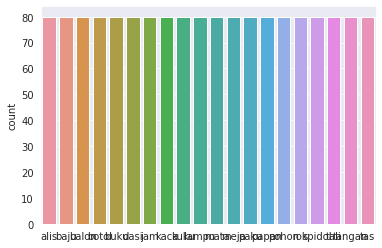

In [ ]:
l = []
for i in train:
  if(i[1] == 0):
    l.append("alis")
  elif(i[1] == 1):
    l.append("baju")
  elif(i[1] == 2):
    l.append("balon")
  elif(i[1] == 3):
    l.append("botol")
  elif(i[1] == 4):
    l.append("buku")
  elif(i[1] == 5):
    l.append("dasi")
  elif(i[1] == 6):
    l.append("jam")
  elif(i[1] == 7):
    l.append("kaca")
  elif(i[1] == 8):
    l.append("kuku")
  elif(i[1] == 9):
    l.append("lampu")
  elif(i[1] == 10):
    l.append("mata")
  elif(i[1] == 11):
    l.append("meja")
  elif(i[1] == 12):
    l.append("paku")
  elif(i[1] == 13):
    l.append("papan")
  elif(i[1] == 14):
    l.append("pohon")
  elif(i[1] == 15):
    l.append("rok")
  elif(i[1] == 16):
    l.append("spidol")
  elif(i[1] == 17):
    l.append("tali")
  elif(i[1] == 18):
    l.append("tangan")
  else:
    l.append("tas")
sns.set_style('darkgrid')
sns.countplot(l)

melihat sampel data

Text(0.5, 1.0, 'alis')

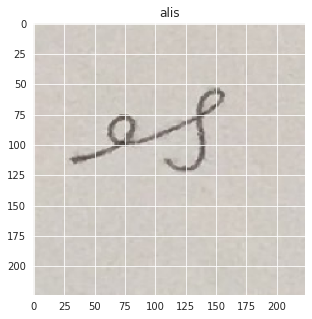

In [ ]:
plt.figure(figsize = (5,5)) 
plt.imshow(train[1][0]) #data kedua dari kelas pertama pada data train
plt.title(labels[train[1][1]]) 

proses pemisahan fitur dan class pada data

In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalisasi data data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

generator data

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening (ZCA memutihkan gambar masih menyerupai gambar asli tidak seperti PCA)
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train) #

pembuatan model cnn

In [ ]:
model = Sequential()
#layer convolutional 1
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
#pooling layer
model.add(MaxPool2D())

#layer convolutional 2
model.add(Conv2D(32, 3, padding="same", activation="relu"))
#pooling layer
model.add(MaxPool2D())

#layer convolutional 3
model.add(Conv2D(64, 3, padding="same", activation="relu"))
#pooling layer
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu")) #hidden layer
model.add(Dense(20, activation="softmax")) #output layer

model.summary()

kostumatisasi model

In [ ]:
opt = Adam(lr=0.000001) #algoritma optimalisasi
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


proses training data

In [ ]:
history = model.fit(x_train,y_train,epochs = 1000 , validation_data = (x_val, y_val))

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


50/50 [==============================] - 13s 54ms/step - loss: 3.0046 - accuracy: 0.0406 - val_loss: 3.0002 - val_accuracy: 0.0500
Epoch 2/1000
50/50 [==============================] - 2s 41ms/step - loss: 3.0045 - accuracy: 0.0494 - val_loss: 2.9981 - val_accuracy: 0.0500
Epoch 3/1000
50/50 [==============================] - 2s 41ms/step - loss: 3.0082 - accuracy: 0.0406 - val_loss: 2.9969 - val_accuracy: 0.0500
Epoch 4/1000
50/50 [==============================] - 2s 41ms/step - loss: 2.9971 - accuracy: 0.0594 - val_loss: 2.9962 - val_accuracy: 0.0425
Epoch 5/1000
50/50 [==============================] - 2s 41ms/step - loss: 3.0024 - accuracy: 0.0506 - val_loss: 2.9955 - val_accuracy: 0.0425
Epoch 6/1000
50/50 [==============================] - 2s 41ms/step - loss: 3.0004 - accuracy: 0.0512 - val_loss: 2.9951 - val_accuracy: 0.0550
Epoch 7/1000
50/50 [==============================] - 2s 41ms/step - loss: 2.9994 - accuracy: 0.0538 - val_loss: 2.9947 - val_accuracy: 0.0575
Epoch 8/100

simpan model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/model training/model-sample.h5')

visualisasi hasil training

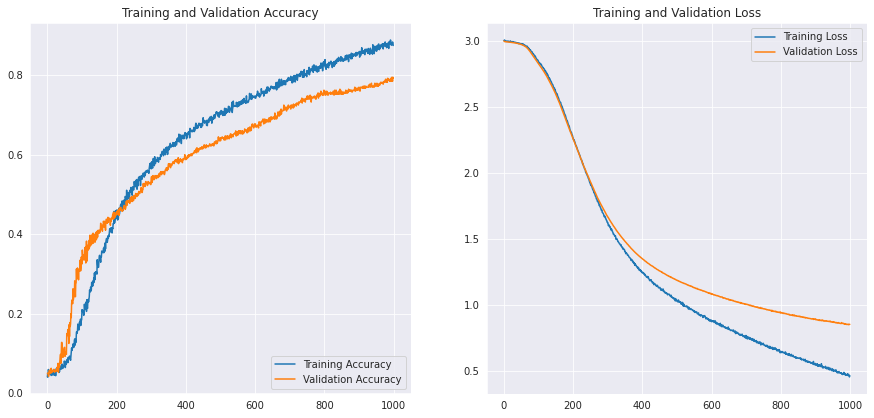

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# print(acc, val_acc, loss, val_loss)
epochs_range = range(1000)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1) # memiliki 2 baris, 2 kolom, dan merupakan plot pertama
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2) # memiliki 2 baris, 2 kolom, dan merupakan plot kedua
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

load model

In [ ]:
model = load_model('/content/drive/MyDrive/Colab Notebooks/model training/model-new7.h5')

simple testing

In [ ]:
data_test = []
img_size = 224
image = cv2.imread('/content/drive/MyDrive/testing/baju/baju.99.jpg')[...,::-1]
resized_arr = cv2.resize(image, (img_size, img_size))
print(resized_arr)
data_test.append([resized_arr, 2])
data_test = np.array(data_test)
print(data_test)
x_test, y_test = [], []
for feature, label in data_test:
  x_test.append(feature)
  y_test.append(label)
x_test = np.array(x_test) / 255
print(x_test)
x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print(y_test)
probs = model.predict([x_test])
probs.shape

In [ ]:
prediction = probs.argmax(axis=1)
# print(probs[prediction] * 100)
print(prediction[0])
classes[prediction[0]]

prediksi data test

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
model = load_model('/content/drive/MyDrive/Colab Notebooks/model training/model-sample.h5')
probs = model.predict([x_test]) #probabilitas
prediction = probs.argmax(axis=1) #prediksi

In [ ]:
accuracy_score(y_test, prediction)

0.805

prediksi data train

In [ ]:
probs = model.predict([x_train])
prediction = probs.argmax(axis=1)
accuracy_score(y_train, prediction)

0.9325

In [ ]:
print(y_train)
print(prediction)

[ 0  0  0 ... 19 19 19]
[ 0  0 19 ... 19 19 19]


In [ ]:
print(y_test)
print(prediction)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16

In [ ]:
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test, prediction)
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test, prediction)
print('Classification report : \n',matrix)

Confusion matrix : 
 [[18  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0]
 [ 0 18  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 14  1  0  0  1  0  2  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  1 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2]
 [ 0  1  0  0 13  0  0  0  1  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  4  1  0  0 13  0  1  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  3  1  0  0  0  0 14  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0 16  0  0  0  1  0  1  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  1 18  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  1  1  0  0  0 14  0  0  0  0  2  0  0  0  0]
 [ 0  1  0  1  0  0  0  1  0  0  1 14  0  0  1  1  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  1  0  0  0 16  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0 15  2  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  1  0  0  0  1  0  0  0  0